##### Some standard imports...

In [419]:
from sklearn.svm import LinearSVR,LinearSVC
from sklearn.linear_model import Lasso,Ridge
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, accuracy_score as accuracy
from sklearn.preprocessing import normalize
import pandas as pd, numpy as np
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

##### Loading and data preprocessing...

In [312]:
targets = pd.read_csv("./CoinTargets.csv")
ftrs = pd.read_csv("./myFeaturesWPaths.csv")

In [313]:
ftrs = pd.DataFrame([f for f in ftrs.itertuples() if "3pm" not in f.paths])
ftrs['sub'] = ftrs['paths'].map(lambda x:x.split("/")[-1].split("-")[0])
ftrs['date'] = ftrs['paths'].map(lambda x:"-".join(x.split("/")[-1].split("-")[1:4]))
features  = ftrs.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,17]]

##### This is just to remind us what our options are for setting up feature/targets

In [327]:
print(set(targets['Coin']))
print(set(ftrs['sub']))

{'QSP', 'OMG', 'BTC', 'REQ', 'NEO', 'NANO', 'ETH'}
{'OMGTraders', 'nanocurrency', 'CryptoCurrency', 'ethereum', 'Bitcoin', 'omise_go', 'RequestNetwork', 'Quantstamp', 'NEO', 'ethtrader'}


In [474]:
class regressor:
  def __init__(self,X,Y):
    self.X = X
    self.Y = Y
  def regression(self):
    self.models = [{"name":"SVR","model":LinearSVR()},
          {"name":"Lasso","model":Lasso()},
          {"name":"Ridge","model":Ridge()},
          {"name":"Neural Net","model":MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100,100,100))}]
    X = self.X
    Y = self.Y
    for model in self.models:
      scores = []
      kf = KFold(n_splits=10)
      print(f"{model['name']} regression performance")
      for train_index,test_index in kf.split(X):
        Xtrain, Xtest = X[train_index], X[test_index]
        Ytrain, Ytest = Y[train_index], Y[test_index]
        model['model'].fit(Xtrain,Ytrain)
        mse = mean_squared_error(Ytest,model['model'].predict(Xtest))
        scores.append(mse)
      print(f"{np.mean(scores)}")
  def plot(self,n=0,sign=False):
    self.models[n]['model'].fit(X,Y)
    X1 = self.models[n]['model'].predict(X)
    X2 = Y
    right_direction = 0
    wrong_direction = 0
    for i,p in enumerate(X1):
      if np.sign(p) == np.sign(X2[i]): right_direction += 1
      else: wrong_direction += 1
    print(f"Right:Wrong :: {right_direction}:{wrong_direction}")
    plt.plot(list(zip(X1,X2)))

In [453]:
def makeXY(targets,features,coin,subs):
  days = []
  for sub in subs:
    days.append(set(features[features['sub']==sub]['date']))       
  days = sorted(list(reduce(lambda a,b: a|b, days)))
  Y = []
  #Collect target values
  t = targets[targets['Coin']==coin]
  for d in days:
    c = int(t[t['PrvDay'] == d]['Change'])
    Y.append(c)
  #Collect features
  X = np.zeros([len(days),len(subs)*14])
  for j,sub in enumerate(subs):
    f = features[features['sub']==sub]
    for i,d in enumerate(days):
      try:
        X[i,j*14:j*14+14] = np.array(f[f['date']==d].iloc[:,:-2])
      except:
        X[i,j*14:j*14+14] = np.zeros(14)
  return X,np.array(Y)


In [505]:
X,Y = makeXY(targets,features,"BTC",["CryptoCurrency","ethereum","ethtrader"])

SVR regression performance
1363287.9853793036
Lasso regression performance


/l/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


853253.8400258307
Ridge regression performance
922450.4599425141
Neural Net regression performance
1133587.650838741
Right:Wrong :: 103:44


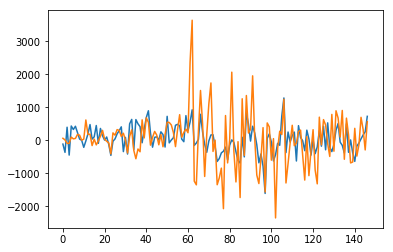

In [506]:
R = regressor(X,Y)
R.regression()
R.plot(1)